### Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

np.random.seed(2)

### Read data from .csv format

In [5]:
data = pd.read_csv('input\creditcard.csv')

### Data exploration

Let's have a look on the data:

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Preprocessing

Let's standardize our data. StandardScaler transforms the data in such a manner that it has mean as 0 and standard deviation as 1. Standardization is useful for data which has negative values. It arranges the data in normal distribution. 

In [7]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Now we are going to delete 'Time' column from dataframe as it is unnecessary:

In [9]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


We specify train and test data:

In [10]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [11]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [12]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


We split our data into train and test sets:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_train.shape

(199364, 29)

In [15]:
X_test.shape

(85443, 29)

We transform our dataset into arrays:

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Deep neural network

We are going to create deep neural network to check is our transaction is a fraud. At first, proper libraries are imported:

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Let's create our model. In order to avoid overfitting, Dropout layer is added in-between. In most cases, RELU activation function is used except for last layer where sigmoid activation function is used because we would like to solve binary problem. We should specify in the model how many columns are expected in the 1st layer which should be the same as the number of columns in our dataset (that is why input_layer = 29). In our last layer we will have single output node - that is a probability of the transaction being a fraud or safe. In the other layers we might have as many nodes as we consider necessary. When it comes to Dropout layer we will have 0.5 probability of dropping each node:

In [18]:
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Let's check our model using summary function

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


### Training

Let's call compile method using Adam optimizer and use accuracy to measure our results:

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





199364/199364 [==============================] - 35s 176us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 34s 171us/step - loss: 0.0039 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 35s 178us/step - loss: 0.0036 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 35s 176us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 35s 176us/step - loss: 0.0033 - acc: 0.9994


In [21]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 23us/step


In [22]:
print(score)

[0.004128264821987964, 0.9993562960102056]


We achieved 99.94% accuracy of our model

In [23]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [25]:
print(cnf_matrix)

[[85276    20]
 [   35   112]]


Text(0.5, 15.0, 'Predicted label')

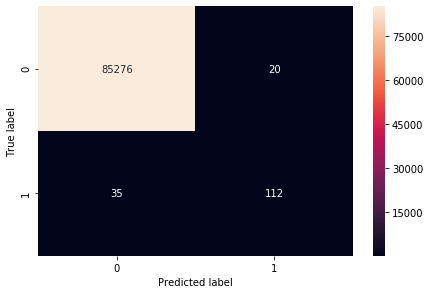

In [30]:
ax = sns.heatmap(cnf_matrix, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

From the confusion matrix, we can observe that although 85394 out of 85443 cases were classified correctly, we still have 30 cases which were fraud but were classified as not fraud.

Now let's plot a confusion matrix for whole dataset. Notice that now we are using the entire X parameter:

In [28]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix2 = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix2)

[[284250     65]
 [   106    386]]


Text(0.5, 15.0, 'Predicted label')

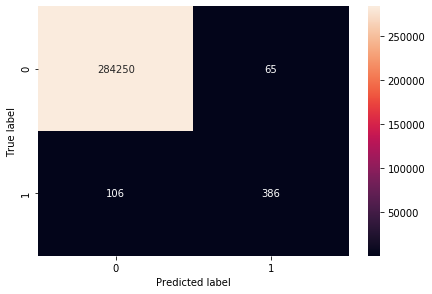

In [31]:
ax2 = sns.heatmap(cnf_matrix2, annot=True, fmt="d")
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')